<a href="https://colab.research.google.com/github/biancarodriguez009/datasets/blob/main/Module6_Group_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the Libraries

#Dataframe and numerical library
import pandas as pd
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learming Model
from sklearn.linear_model import LogisticRegression

1. **Find and Load a Large Dataset** \
    **Task**: Each group must find a publicly available dataset with at least 10,000 rows. Suggested sources: Kaggle, UCI Machine Learning Repository, government databases.  Find any dataset but it must be a dataset that has many records. \
    **Deliverable**: A Colab/Jupyter Notebook with code to load the dataset.

2. **Perform a Structural Investigation** \
  **Task**: Investigate the structure of the dataset (load data, use .info(), .nunique(), data type validation). \
  **Deliverable**: Summary report of the structural aspects of the dataset.

3. **Perform a Quality Investigation** \
  **Owner**: Eslin \
  **Task**: Clean the dataset by identifying and removing duplicates, renaming and dropping columns, treat datetimes, and handling missing values.  These are just some recommendations - it is up to you to use your judgment to determine all steps needed to clean the data that you have selected. \
  **Deliverable**: Cleaned dataset with a report explaining the steps taken.  Make sure to save the data as a csv at this stage and name it:  xxxx_cleaned_data.csv  (xxxx is your dataset name).

4. **Merge with a Second DataFrame** \
  **Owner**: Dona \
  **Task**: Find a secondary dataset and integrate it with the primary dataset using join or concatenation.  Again - save as another csv with a different name.\
  **Deliverable**: Merged dataset with an explanation of the method used.

5. **Data Binning**
  **Owner**: Dona \
  **Task**: Implement binning on at least one column to categorize data.  Again, save your dataset with a different name. /
  **Deliverable**: Updated dataset with binned data and a justification for the binning strategy.

6. **Lambda Function Application** \
  **Owner**: Ciara \
  **Task:** Use a lambda function to manipulate or create a new column or to edit an existing column.  Save the output of this as a new csv. \
  **Deliverable**: Code implementation with an explanation.

7. **Feature Engineering** \
  **Owner:** Bianca \
  **Task:** Add a new, relevant feature to the dataset.  Save the output as a csv.\
  **Deliverable:** Dataset with the new feature and rationale for its addition.

8. **Deep Exploratory Data Analysis**
**Owner**: Eslin
**Task**: Conduct an in-depth EDA to extract 5 meaningful insights, supported by visuals. \
**Deliverable:** Report with insights and corresponding visualizations. \
\
**Make sure to submit all data files as well**

##Perform a Structural Investigation


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/EslinLeiva/Data-Wrangling-and-Machine-Learning/main/covid-data.csv")
df.sample(5)

,continent,location,date,total_cases,new_cases,total_deaths,icu_patients,hosp_patients,weekly_hosp_admissions,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,population
148091,North America,Sint Maarten (Dutch part),8/28/2022,10809.0,0.0,87.0,NaN,NaN,NaN,NaN,...,NaN,36327.232,NaN,NaN,NaN,NaN,NaN,NaN,78.95,44192
90327,Europe,Jersey,8/29/2021,9264.0,166.0,77.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110796
121403,Asia,Philippines,12/14/2021,2836443.0,0.0,50280.0,NaN,NaN,NaN,23302795.0,...,2.661,7599.188,NaN,370.437,7.8,40.8,78.463,1.0,71.23,115559008
56911,South America,Falkland Islands,5/13/2023,1923.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,3801
150256,Europe,Slovenia,6/28/2020,1584.0,63.0,114.0,0.0,7.0,3.0,100613.0,...,12.930,31400.840,NaN,153.493,20.1,25.0,NaN,4.5,81.32,2119843


In [3]:
#Total records in this dataset 186,621. There are a lot of missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186621 entries, 0 to 186620
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   continent                   186621 non-null  object 
 1   location                    186621 non-null  object 
 2   date                        186621 non-null  object 
 3   total_cases                 171355 non-null  float64
 4   new_cases                   179019 non-null  float64
 5   total_deaths                160979 non-null  float64
 6   icu_patients                32885 non-null   float64
 7   hosp_patients               35049 non-null   float64
 8   weekly_hosp_admissions      21223 non-null   float64
 9   total_tests                 51909 non-null   float64
 10  positive_rate               58051 non-null   float64
 11  tests_per_case              57649 non-null   float64
 12  tests_units                 63078 non-null   object 
 13  total_vaccinat

In [4]:
#We have 4 continents and 127 countries in this dataset.
df.nunique()

continent                         4
location                        127
date                           1498
total_cases                   18659
new_cases                      9479
total_deaths                  10547
icu_patients                   4070
hosp_patients                  9975
weekly_hosp_admissions         7809
total_tests                   51468
positive_rate                  4784
tests_per_case                 4873
tests_units                       3
total_vaccinations            49149
people_vaccinated             44512
people_fully_vaccinated       42823
total_boosters                27675
population_density              110
aged_65_older                    92
aged_70_older                    95
gdp_per_capita                   97
extreme_poverty                  29
cardiovasc_death_rate            96
female_smokers                   70
male_smokers                     71
handwashing_facilities           29
hospital_beds_per_thousand       80
life_expectancy             

# Quality Investigation and Data Cleaning

In [5]:
#There are a lot of missing values in the dataset, we will evaluate it better and see if we endup needing all the columns.

#Based on what I can already see this dataset is technically devided into 3 parts, one is about covid cases and deaths, another about vaccinations and the last one is miscellaneous
#(columns that may have different use cases depending on what you are interested in discovering)

print(df.shape)
df.isnull().sum()

(186621, 29)


continent                          0
location                           0
date                               0
total_cases                    15266
new_cases                       7602
total_deaths                   25642
icu_patients                  153736
hosp_patients                 151572
weekly_hosp_admissions        165398
total_tests                   134712
positive_rate                 128570
tests_per_case                128972
tests_units                   123543
total_vaccinations            137095
people_vaccinated             140632
people_fully_vaccinated       142101
total_boosters                156575
population_density             24234
aged_65_older                  49297
aged_70_older                  46471
gdp_per_capita                 43390
extreme_poverty               100918
cardiovasc_death_rate          44983
female_smokers                 72865
male_smokers                   75821
handwashing_facilities        143734
hospital_beds_per_thousand     47746
l

In [6]:
#Trying to inspect some columns values to make sure we can replace with 0
df[['tests_per_case', 'tests_units','positive_rate','tests_per_case','population_density','aged_65_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','hospital_beds_per_thousand','life_expectancy']]

,tests_per_case,tests_units,positive_rate,tests_per_case,population_density,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,hospital_beds_per_thousand,life_expectancy
0,11.3,tests performed,0.0882,11.3,104.871,13.188,11803.431,1.1,304.195,2.89,78.57
1,9.9,tests performed,0.1014,9.9,104.871,13.188,11803.431,1.1,304.195,2.89,78.57
2,10.9,tests performed,0.0918,10.9,104.871,13.188,11803.431,1.1,304.195,2.89,78.57
3,10.9,tests performed,0.0920,10.9,104.871,13.188,11803.431,1.1,304.195,2.89,78.57
4,9.7,tests performed,0.1028,9.7,104.871,13.188,11803.431,1.1,304.195,2.89,78.57
...,...,...,...,...,...,...,...,...,...,...,...
186616,NaN,NaN,NaN,NaN,53.508,2.922,1479.147,18.8,495.003,0.70,66.12
186617,NaN,NaN,NaN,NaN,53.508,2.922,1479.147,18.8,495.003,0.70,66.12
186618,NaN,NaN,NaN,NaN,53.508,2.922,1479.147,18.8,495.003,0.70,66.12
186619,NaN,NaN,NaN,NaN,53.508,2.922,1479.147,18.8,495.003,0.70,66.12


Text(158.22222222222223, 0.5, 'Sample Number')

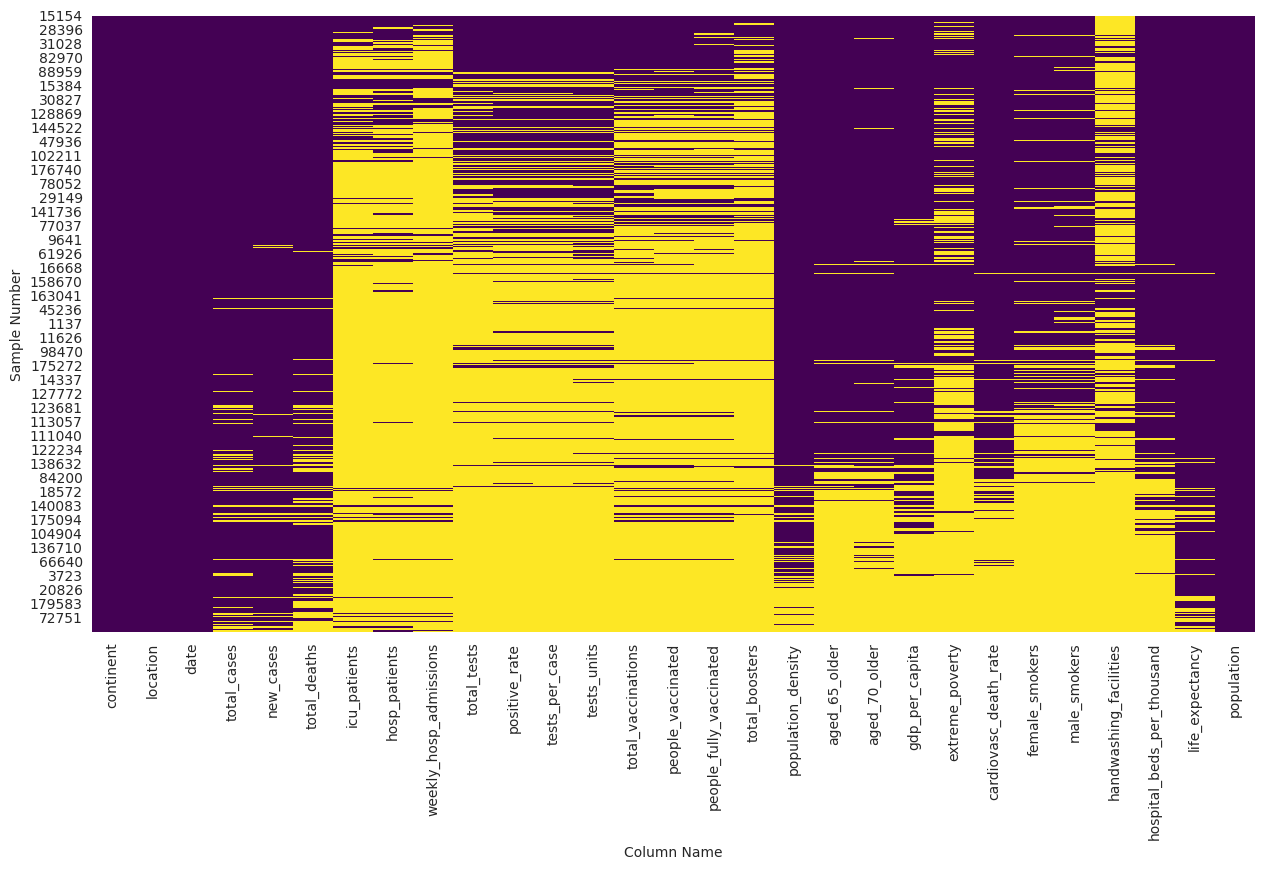

In [7]:
#Visualizing missing values. We can see there are a lot of missing values in the dataset.

# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df.loc[df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Name')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

In [8]:
#Filling the following columns with 0 where there is an empty value. The level of granularity on this dataset goes based on the the date.
#The emty values mean that there was no data recorded on that date.

columns_to_replace_nan = ['total_cases','new_cases','total_deaths','icu_patients','hosp_patients','weekly_hosp_admissions','total_tests','positive_rate','tests_per_case','total_vaccinations','people_vaccinated','people_fully_vaccinated','total_boosters','population_density','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy']
df[columns_to_replace_nan] = df[columns_to_replace_nan].fillna(0)

In [9]:
df.isnull().sum()

continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
icu_patients                       0
hosp_patients                      0
weekly_hosp_admissions             0
total_tests                        0
positive_rate                      0
tests_per_case                     0
tests_units                   123543
total_vaccinations                 0
people_vaccinated                  0
people_fully_vaccinated            0
total_boosters                     0
population_density                 0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
cardiovasc_death_rate              0
female_smokers                     0
male_smokers                       0
handwashing_facilities             0
hospital_beds_per_thousand         0
l

In [10]:
#We will not need this column as it has low variance and does not provide any real insight or value to our dataset
df.drop('tests_units', axis = 1, inplace = True)

In [11]:
#Changing column name location to Country as it makes more sense
df = df.rename(columns = {'location': 'country'})

Text(158.22222222222223, 0.5, 'Sample Number')

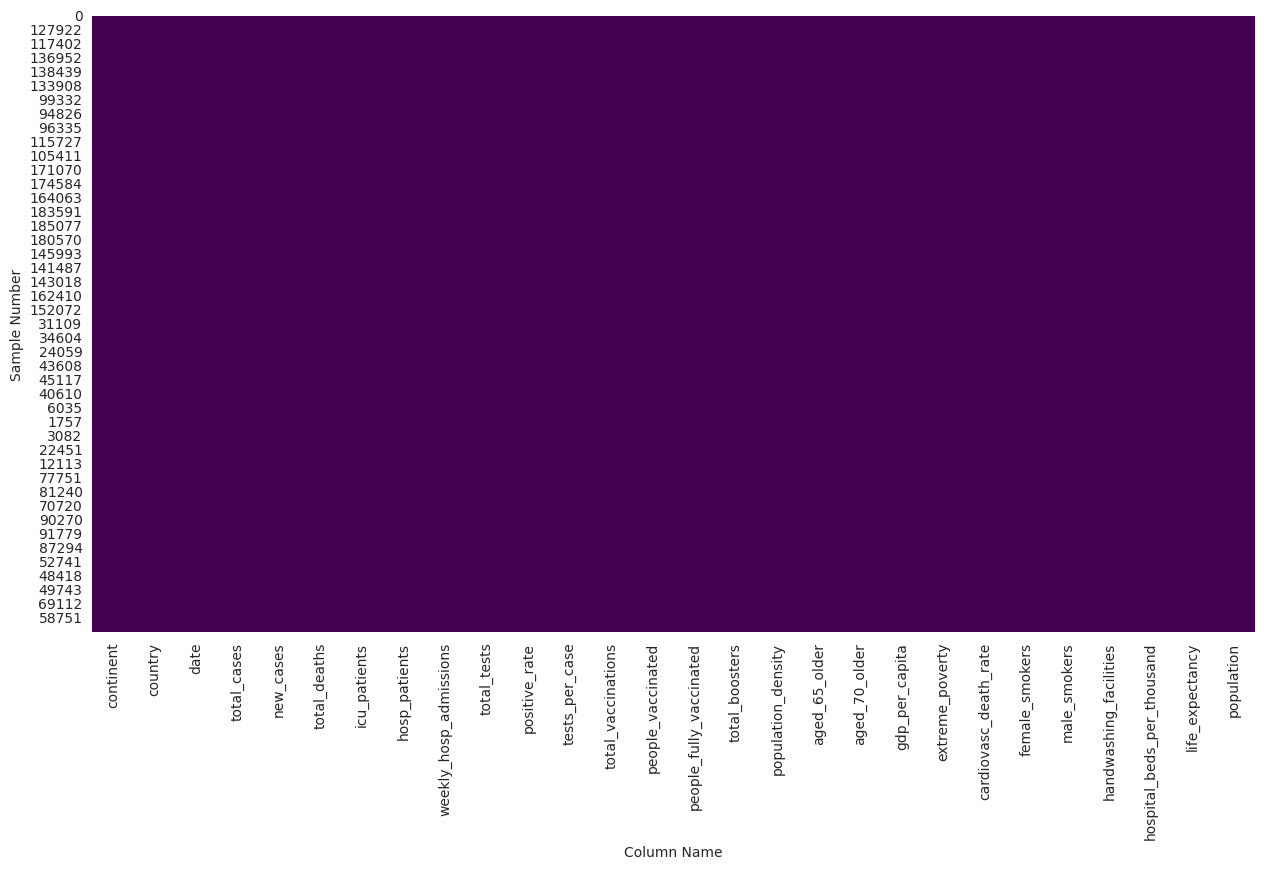

In [12]:
#Confirming all missing values are gone

# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df.loc[df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Name')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

In [13]:
#Checking for duplicates based on the same date and the same country. Therre are no duplicates based on these paramenters.

duplicate_rows = df.duplicated(subset=['date', 'country'], keep=False)

print(df[duplicate_rows])

Empty DataFrame
Columns: [continent, country, date, total_cases, new_cases, total_deaths, icu_patients, hosp_patients, weekly_hosp_admissions, total_tests, positive_rate, tests_per_case, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, population_density, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, population]
Index: []

[0 rows x 28 columns]


#Joining Data

This data set contains the crude estimates of obesity among adults by country in 2016 from the World Health Organization's Global Health Observatory data repository risk factor Overweight / Obesity. Obesity here is defined as BMI ≥ 30. I have prepared the data for analysis by removing the confidence intervals from each data point (shown in brackets in original data).

In [ ]:
# Merging the clean dataset with the WHO Obesity by country dataset. 1st we want to melt the columns of the dataset

In [ ]:
#From the info above, we can see that our dataset is missing the feature name for
# the country, which we will add, the data is not needed as we have seen both sex have been combined

In [14]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Praeksis27/Data_Wrangling/main/WHO_obesityByCountry_2016.csv")

In [15]:
df2.sample(10)

,Unnamed: 0,Both.sexes,Male,Female
97,Liberia,8.6,4.9,12.3
40,Costa Rica,25.7,21.0,30.4
36,Colombia,22.1,17.3,26.7
18,Benin,8.2,4.2,12.2
68,Greece,27.4,26.0,28.7
62,France,23.2,23.5,23.0
75,Honduras,19.4,14.1,24.5
140,Republic of Moldova,20.1,16.9,23.0
83,Israel,26.7,26.1,27.2
48,Denmark,21.3,23.7,18.9


In [16]:
df2.drop(columns=['Both.sexes'], inplace=True)


In [17]:
print(df2.drop)

<bound method DataFrame.drop of                              Unnamed: 0  Male  Female
0                           Afghanistan   2.7     6.2
1                               Albania  21.9    22.8
2                               Algeria  19.4    34.0
3                               Andorra  27.9    28.1
4                                Angola   3.5    10.0
..                                  ...   ...     ...
190  Venezuela (Bolivarian Republic of)  22.1    28.3
191                            Viet Nam   1.6     2.6
192                               Yemen   9.9    18.2
193                              Zambia   3.0    10.0
194                            Zimbabwe   3.7    20.5

[195 rows x 3 columns]>


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  195 non-null    object 
 1   Male        191 non-null    float64
 2   Female      191 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


this tells us tha the DataFrame has 195 countries listed with no missing values. However, there are 4 missing values in the dataset. Since this is a low variance, we will ignore it.

In [19]:
# Rename the 'unnamed' column to 'Country' and dropping both the Obesity column
df2.rename(columns={'Unnamed: 0': 'country'}, inplace=True)
#df2.drop(columns=['Obesity'], inplace=True)
print(df2)

                                country  Male  Female
0                           Afghanistan   2.7     6.2
1                               Albania  21.9    22.8
2                               Algeria  19.4    34.0
3                               Andorra  27.9    28.1
4                                Angola   3.5    10.0
..                                  ...   ...     ...
190  Venezuela (Bolivarian Republic of)  22.1    28.3
191                            Viet Nam   1.6     2.6
192                               Yemen   9.9    18.2
193                              Zambia   3.0    10.0
194                            Zimbabwe   3.7    20.5

[195 rows x 3 columns]


# Data Merging -
In the section below, we have merged both datasets using the merge method

In [20]:
print(df.columns)


Index(['continent', 'country', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'icu_patients', 'hosp_patients',
       'weekly_hosp_admissions', 'total_tests', 'positive_rate',
       'tests_per_case', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'population_density',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'population'],
      dtype='object')


In [21]:

print(df2.columns)

Index(['country', 'Male', 'Female'], dtype='object')


In [22]:
merged_df3 = pd.merge(df[['country','vaccination_rate','female_smokers','male_smokers','total_deaths','people_fully_vaccinated','aged_65_older','aged_70_older','mortality_rate']],
                      df2[['country','Female','Male']], on='country', how='inner')

KeyError: "['vaccination_rate', 'mortality_rate'] not in index"

In [ ]:
print(merged_df3)

        country  vaccination_rate  female_smokers  male_smokers  total_deaths  \
0       Albania               0.0             7.1          51.2  4.354938e-20   
1       Albania               0.0             7.1          51.2  4.354938e-20   
2       Albania               0.0             7.1          51.2  4.354938e-20   
3       Albania               0.0             7.1          51.2  4.354938e-20   
4       Albania               0.0             7.1          51.2  4.354938e-20   
...         ...               ...             ...           ...           ...   
124044    Yemen               0.0             7.6          29.2  5.642791e-20   
124045    Yemen               0.0             7.6          29.2  5.642791e-20   
124046    Yemen               0.0             7.6          29.2  5.642791e-20   
124047    Yemen               0.0             7.6          29.2  5.642791e-20   
124048    Yemen               0.0             7.6          29.2  5.642791e-20   

        people_fully_vaccin

In [ ]:
# merged_df3 as merged DataFrame
# Pivoting the table
pivot_df = merged_df3.pivot_table(index=['country', 'vaccination_rate', 'female_smokers', 'male_smokers', 'total_deaths', 'people_fully_vaccinated', 'aged_65_older', 'aged_70_older', 'mortality_rate'],
                                 values=['Female', 'Male'],
                                 aggfunc='mean').reset_index()

print(pivot_df)


       country  vaccination_rate  female_smokers  male_smokers  total_deaths  \
0      Albania          0.000000             7.1          51.2  4.354938e-20   
1      Albania          0.000000             7.1          51.2  8.709877e-20   
2      Albania          0.000000             7.1          51.2  3.483951e-19   
3      Albania          0.000000             7.1          51.2  7.403395e-19   
4      Albania          0.000000             7.1          51.2  1.001636e-18   
...        ...               ...             ...           ...           ...   
46886    Yemen          0.053179             7.6          29.2  5.642791e-20   
46887    Yemen          0.054049             7.6          29.2  5.642791e-20   
46888    Yemen          0.054368             7.6          29.2  5.642791e-20   
46889    Yemen          0.054606             7.6          29.2  5.642791e-20   
46890    Yemen          0.055112             7.6          29.2  5.642791e-20   

       people_fully_vaccinated  aged_65

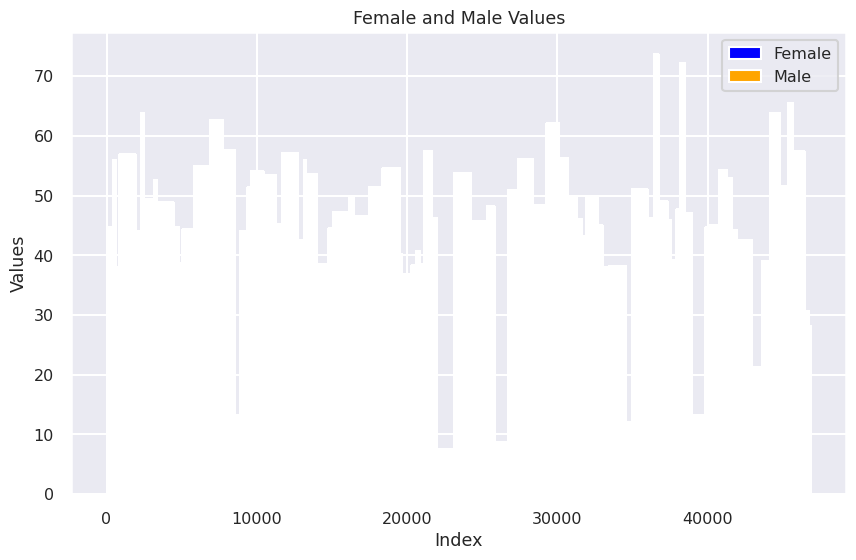

In [ ]:
import matplotlib.pyplot as plt

# defining pivot_df as pivot table DataFrame
# Plotting Female and Male columns
plt.figure(figsize=(10, 6))
plt.bar(pivot_df.index, pivot_df['Female'], color='blue', label='Female')
plt.bar(pivot_df.index, pivot_df['Male'], color='orange', label='Male', bottom=pivot_df['Female'])

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Female and Male Values')
plt.legend()

# Show plot
plt.show()

#Data Binning
##In the section below we are performing the Data binning to group data into bins/categories

In [ ]:
# merged_df3 is the DataFrame containing the 'aged_65_older' and 'aged_70_older' columns
# Combine 'aged_65_older' and 'aged_70_older' columns into a new column
merged_df3['combined_ages'] = merged_df3['aged_65_older'] + merged_df3['aged_70_older']

# Defining the custom bin edges and labels for the combined ages
bin_edges = [0, 65, 70, 100]  # Define the bin edges for the combined age groups
bin_labels = ['<65', '65-70', '>70']  # Define the labels for the combined age groups

# Perform binning on the combined ages
merged_df3['age_group'] = pd.cut(merged_df3['combined_ages'], bins=bin_edges, labels=bin_labels, right=False)

# Save the updated dataset with binned data
merged_df3.to_csv("binned_age_dataset.csv", index=False)

In [ ]:
print(merged_df3.columns)

Index(['country', 'vaccination_rate', 'female_smokers', 'male_smokers',
       'total_deaths', 'people_fully_vaccinated', 'aged_65_older',
       'aged_70_older', 'mortality_rate', 'Female', 'Male', 'combined_ages',
       'age_group'],
      dtype='object')


In [ ]:
# Drop the 'aged_65_older' and 'aged_70_older' columns
merged_df3.drop(columns=['aged_65_older', 'aged_70_older'], inplace=True)

#Save the updated dataset
#merged_df3.to_csv("updated_dataset.csv", index=False)

In [ ]:
#Save the updated dataset
merged_df3.to_csv("updated_dataset.csv", index=False)

In [ ]:
print(merged_df3.columns)

Index(['country', 'vaccination_rate', 'female_smokers', 'male_smokers',
       'total_deaths', 'people_fully_vaccinated', 'mortality_rate', 'Female',
       'Male', 'combined_ages', 'age_group'],
      dtype='object')


# Lambda Function Application

In [ ]:
# changing the "date" column to the datetime datatype
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Looking at the total number of cases per date
total_cases = lambda df: df.groupby('date')['total_cases'].sum()

In [ ]:
df.head()

,continent,country,date,total_cases,new_cases,total_deaths,icu_patients,hosp_patients,weekly_hosp_admissions,total_tests,...,cardiovasc_death_rate,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,population,vaccination_rate,mortality_rate,healthcare_capacity_pressure
0,Europe,Albania,2020-03-15,33.0,33.0,3.518255e-07,0.0,0.0,0.0,532.0,...,304.195,7.1,51.2,0.0,2.89,78.57,2842318,0.0,0.030303,0.0
1,Europe,Albania,2020-03-16,33.0,0.0,3.518255e-07,0.0,0.0,0.0,563.0,...,304.195,7.1,51.2,0.0,2.89,78.57,2842318,0.0,0.030303,0.0
2,Europe,Albania,2020-03-17,33.0,0.0,3.518255e-07,0.0,0.0,0.0,605.0,...,304.195,7.1,51.2,0.0,2.89,78.57,2842318,0.0,0.030303,0.0
3,Europe,Albania,2020-03-18,33.0,0.0,3.518255e-07,0.0,0.0,0.0,665.0,...,304.195,7.1,51.2,0.0,2.89,78.57,2842318,0.0,0.030303,0.0
4,Europe,Albania,2020-03-19,33.0,0.0,3.518255e-07,0.0,0.0,0.0,697.0,...,304.195,7.1,51.2,0.0,2.89,78.57,2842318,0.0,0.030303,0.0


In [ ]:
# Created a new column called "case category" within the dataset that categorizes each country as "High" or "Low"
# Dependent on if the total_cases > 1000 means "High" and everything else means "Low"
#df["case_category"] = df.apply(lambda x:"High" if [total_cases] > 1000  else "Low")
df["case_category"] = df["total_cases"].apply(lambda x: "High" if x > 1000 else "Low")




#Feature Engineering


Based on the existing data we could possible use the following engineered features to provide

In [ ]:
df['vaccination_rate'] = (df['people_vaccinated'] + df['people_fully_vaccinated']) / df['population']
df['mortality_rate'] = df['total_deaths'] / df['total_cases']
df['healthcare_capacity_pressure'] = (df['icu_patients'] + df['hosp_patients']) / df['hospital_beds_per_thousand']
df['total_deaths'] = (df['total_deaths']  / df['population'])

In [ ]:
#Ideas for feature engineering deviding total deaths by population of the country (sum(total_deaths / population)) this would tell us what percentage of population died and which country had the highest rate of death.

#EDA

We can see in the viz below that there are a lot of possitive correlation between certain columns. the highest correlation occurs between total cases of covid to total deaths due to covid. Thinking about this makes sense as the more number of covid cases that occur the higher the death toll will be, this does not only applies to covid but other sicknesses as well.

I cant say for certain yet but by just looking at this there is a high chance that there are more female smokers that deied of covid than male smokers.

There are other highly correlated columns as well like total vaccinations with Boosters and People vaccinated, these columns are all related to eachother so it makes sense for them to be correlated.

<ipython-input-24-e0e8396aed52>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,:].corr(method='spearman'), cmap='rainbow_r', annot=True)


<Axes: >

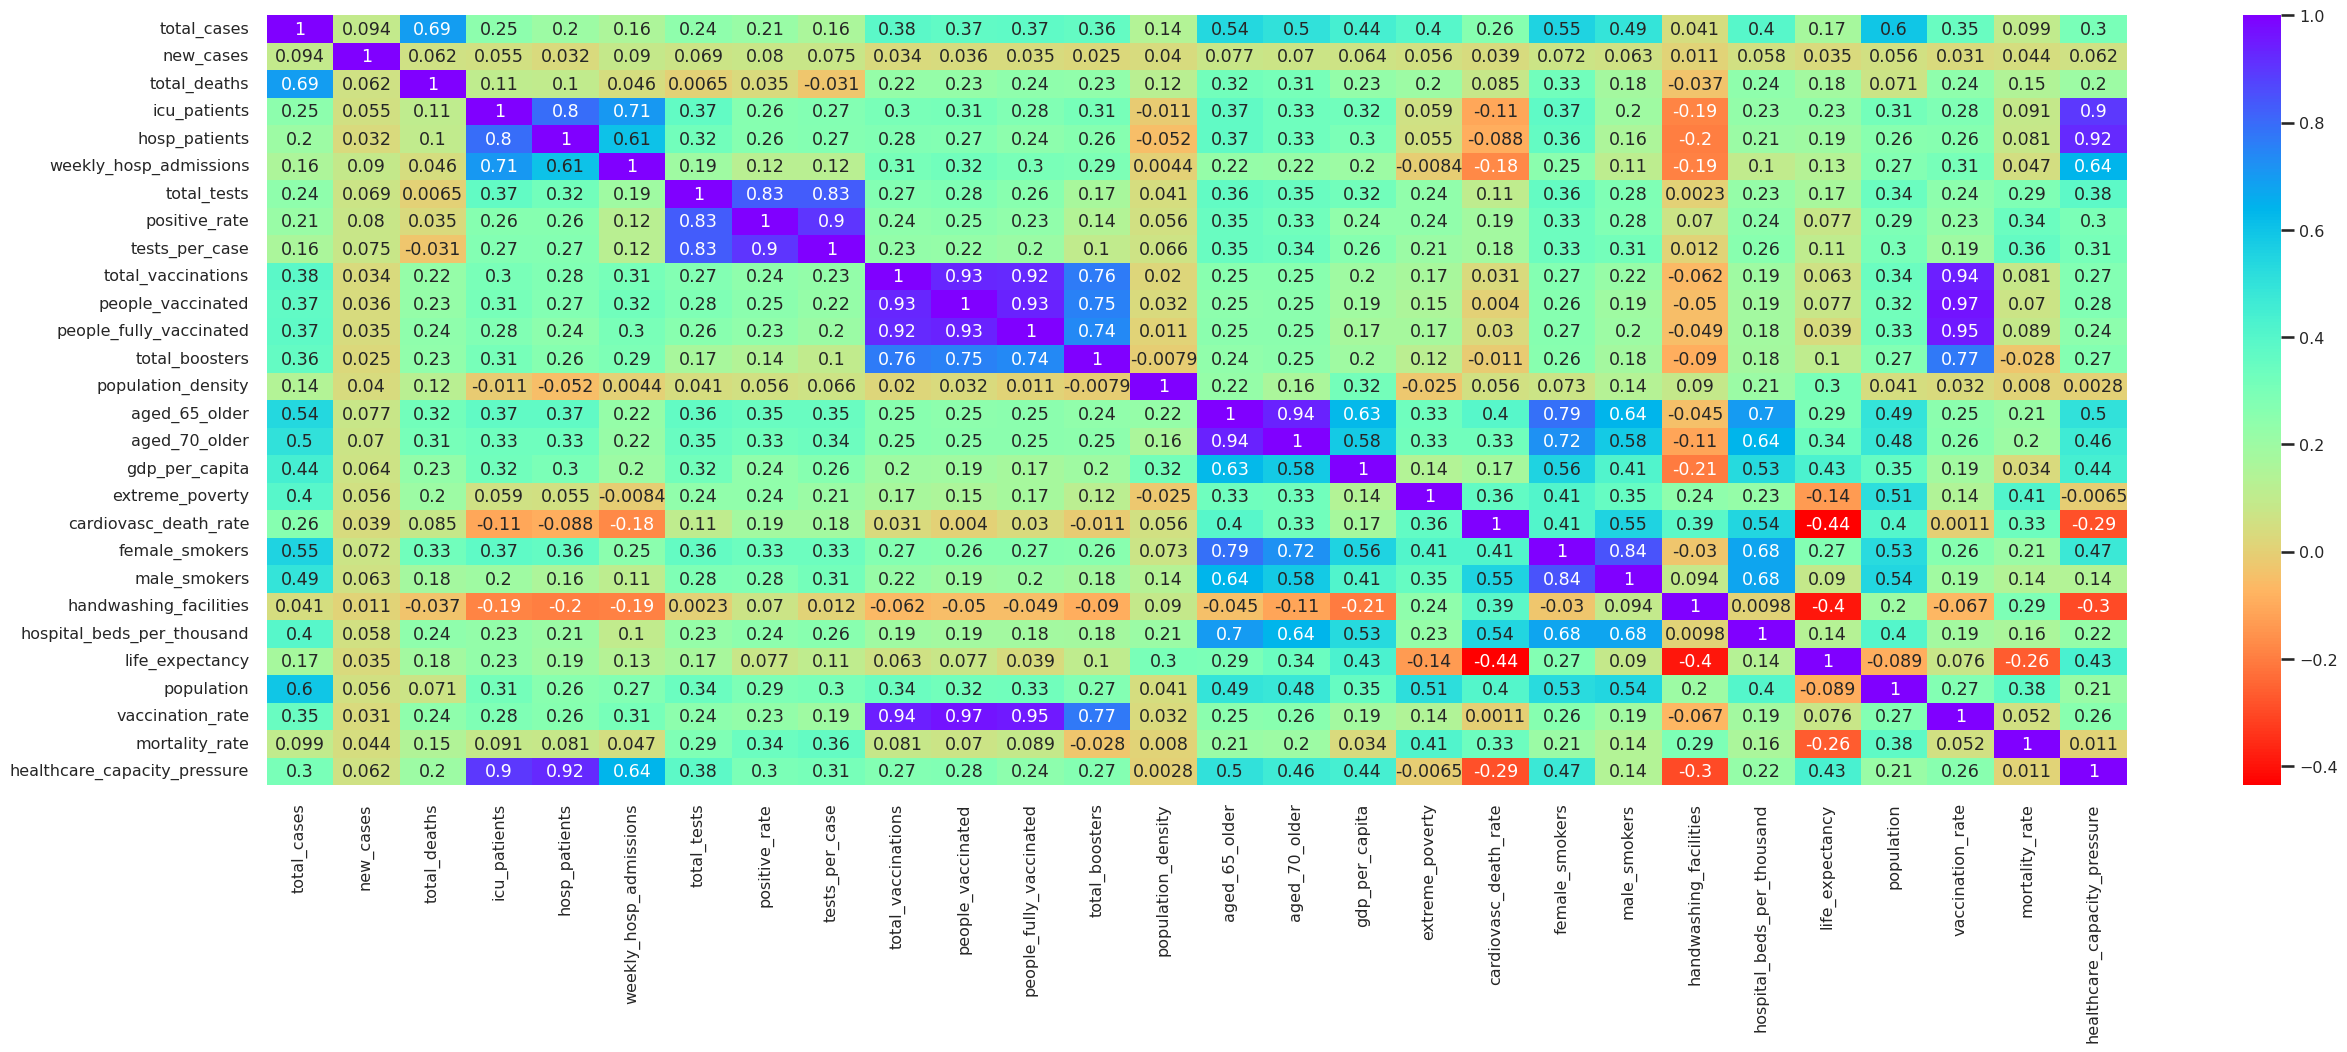

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

sns.heatmap(df.iloc[:,:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [ ]:
#Looking at the death toll each country had. Sorted Descending order and limiting results by the largest 20 countries with the highest death toll.

total_deaths_by_country = df.groupby('country')['total_deaths'].sum()

population_by_country = df.groupby('country')['population'].first()

death_toll_by_country = total_deaths_by_country / population_by_country

death_toll_by_country_df = death_toll_by_country.reset_index()
death_toll_by_country_df.columns = ['country', 'death_toll_by_country']

death_toll_by_country_df = death_toll_by_country_df.sort_values(by='death_toll_by_country', ascending=False)


print(death_toll_by_country_df.head(20))

                             country  death_toll_by_country
73                        Montserrat               0.000292
95                        San Marino               0.000117
43                         Gibraltar               0.000107
64                     Liechtenstein               0.000055
17            British Virgin Islands               0.000054
14   Bonaire Sint Eustatius and Saba               0.000046
100        Sint Maarten (Dutch part)               0.000045
92        Saint Martin (French part)               0.000044
71                            Monaco               0.000044
89                  Saint Barthelemy               0.000034
2                           Anguilla               0.000033
93         Saint Pierre and Miquelon               0.000033
12                           Bermuda               0.000032
1                            Andorra               0.000028
5                              Aruba               0.000021
114         Turks and Caicos Islands    

In [ ]:
#Top 10 countries with the highest cases in millions

cases_by_country = df.groupby('country')['total_cases'].sum().sort_values(ascending = False).head(10)

print(round(cases_by_country / 1e9), 2)

country
United States     86.0
India             43.0
China             40.0
Brazil            33.0
France            28.0
Germany           26.0
United Kingdom    20.0
South Korea       19.0
Italy             18.0
Russia            18.0
Name: total_cases, dtype: float64 2


In [ ]:
#Top 10 total deaths by country

deaths_by_country = df.groupby('country')['total_deaths'].sum().sort_values(ascending = False).head(10)

print(deaths_by_country)

country
Peru                      7.049215
Bulgaria                  5.150874
Bosnia and Herzegovina    4.788432
North Macedonia           4.612278
Hungary                   4.569442
Montenegro                4.013480
Czechia                   3.995641
San Marino                3.952330
Croatia                   3.924492
Slovenia                  3.916199
Name: total_deaths, dtype: float64


ValueError: supplied range of [0.0, inf] is not finite

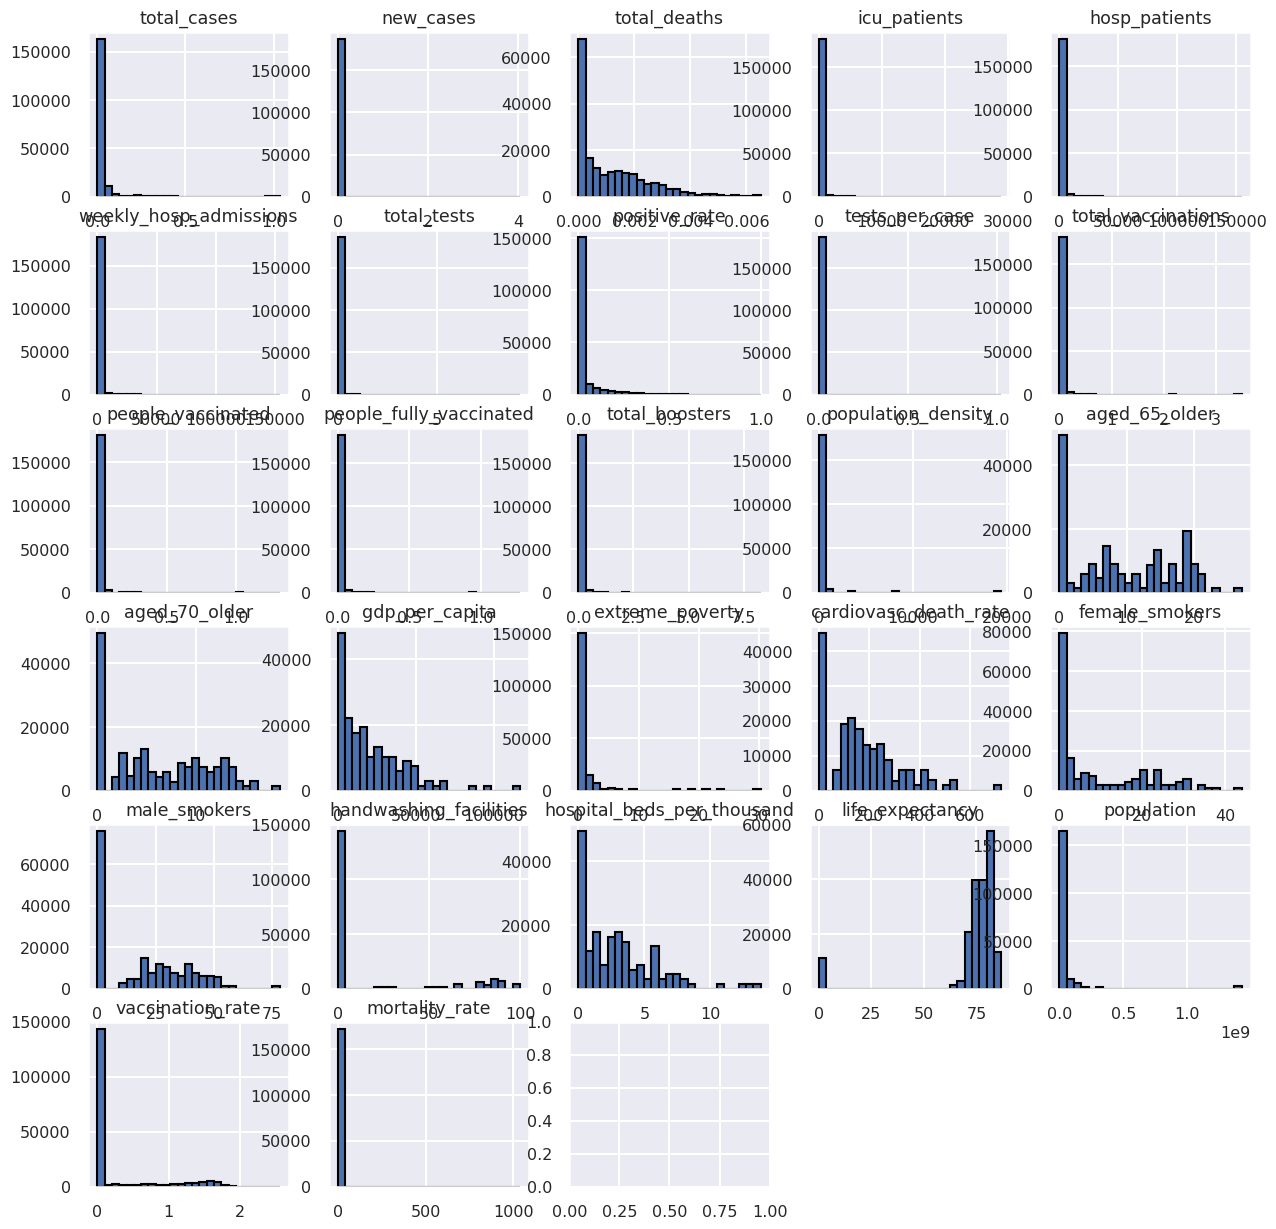

In [ ]:
# Feature Distribution
%%time
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 15), layout=(-1, 5),
edgecolor="black")
plt.tight_layout();

In [ ]:
#If you guys dont come up with any lambda funtion then we can use this one in the EDA to see the coorelation between columns

df.drop("total_cases", axis=1).apply(lambda x: x.corr(df.total_cases,method='spearman'))

continent                      -0.126265
country                        -0.029055
date                            0.008646
new_cases                       0.093642
total_deaths                    0.693046
icu_patients                    0.248152
hosp_patients                   0.200163
weekly_hosp_admissions          0.156322
total_tests                     0.241027
positive_rate                   0.210381
tests_per_case                  0.161298
total_vaccinations              0.384795
people_vaccinated               0.368983
people_fully_vaccinated         0.373518
total_boosters                  0.358709
population_density              0.140324
aged_65_older                   0.537819
aged_70_older                   0.504682
gdp_per_capita                  0.443712
extreme_poverty                 0.395819
cardiovasc_death_rate           0.260122
female_smokers                  0.554831
male_smokers                    0.492159
handwashing_facilities          0.041166
hospital_beds_pe

<ipython-input-30-5ac788b83776>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,:].corr(method='spearman'), cmap='rainbow_r', annot=True)


<Axes: >

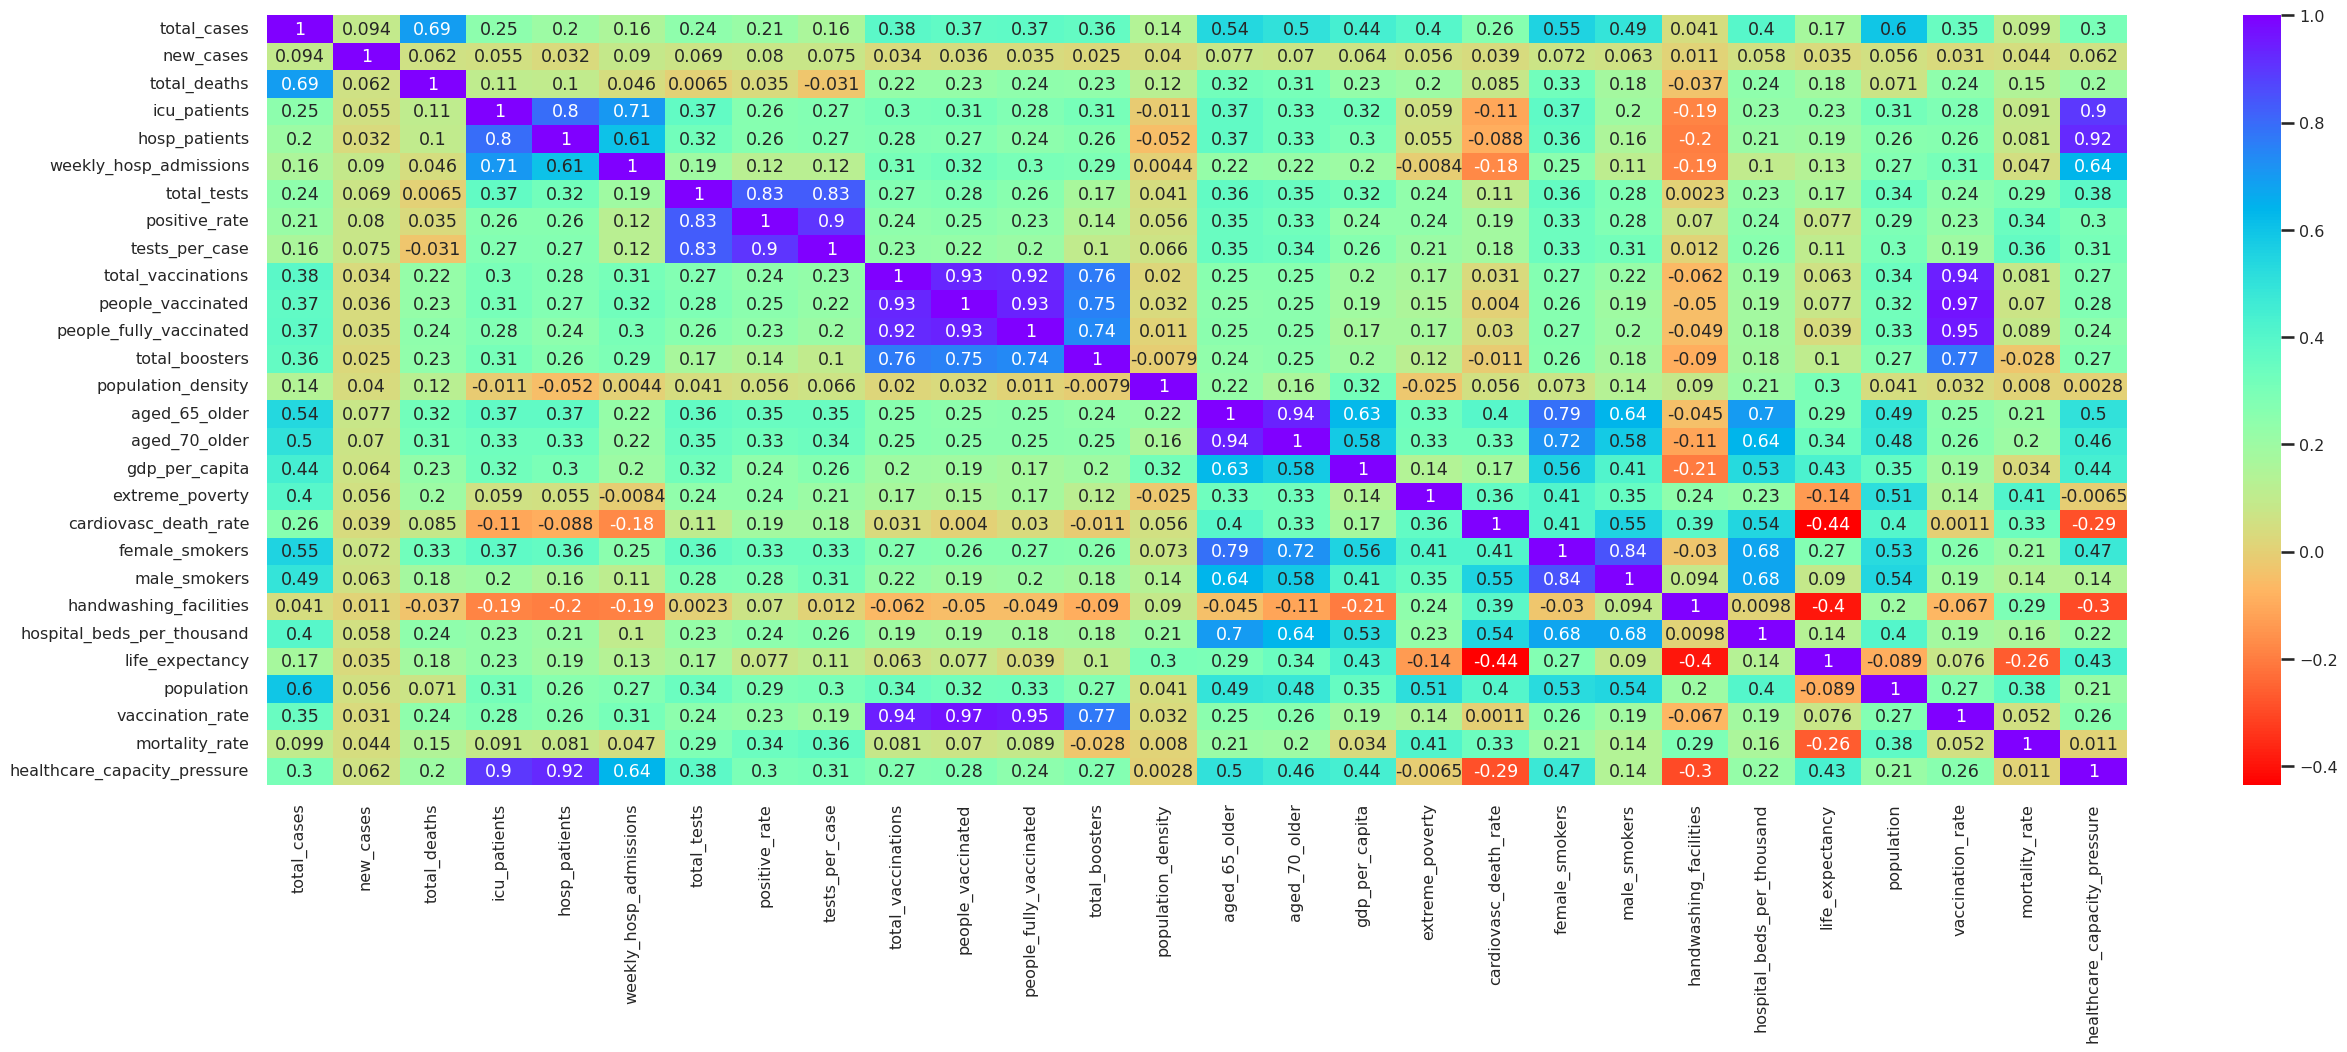

In [ ]:
#We can also use this one to visually see the coorelation between the columns

sns.heatmap(df.iloc[:,:].corr(method='spearman'), cmap='rainbow_r', annot=True)